# 基于区域的CNN

# 1 。用启发性的搜索算法来选择锚框
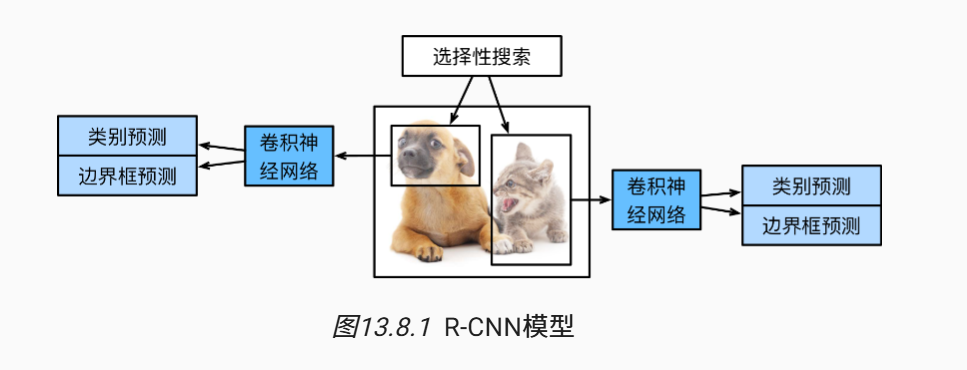
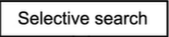

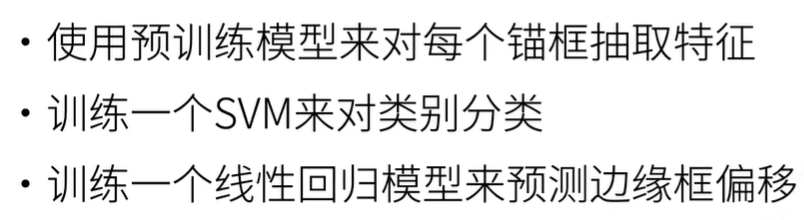

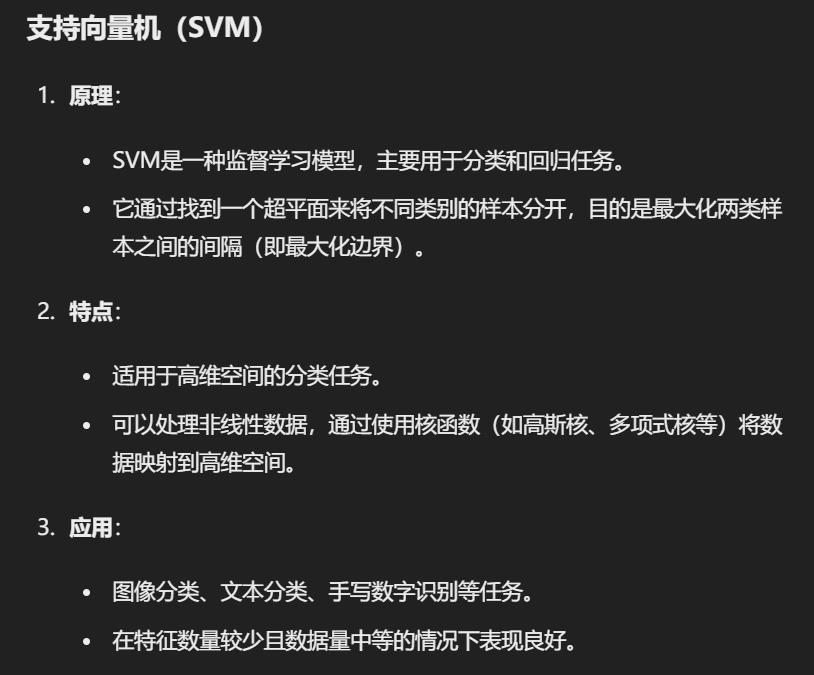
预训练的卷积神经网络例如AlexNet来提取特征

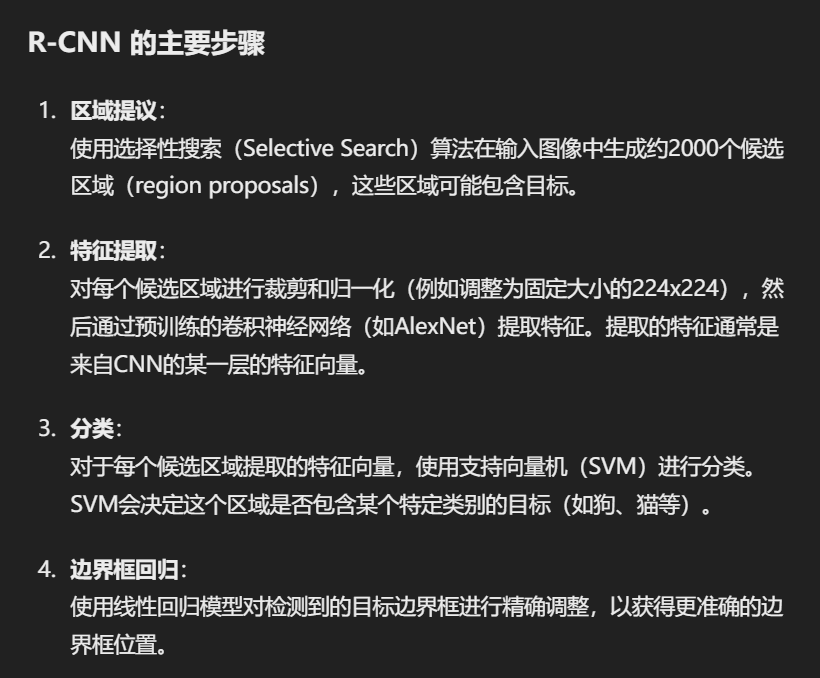

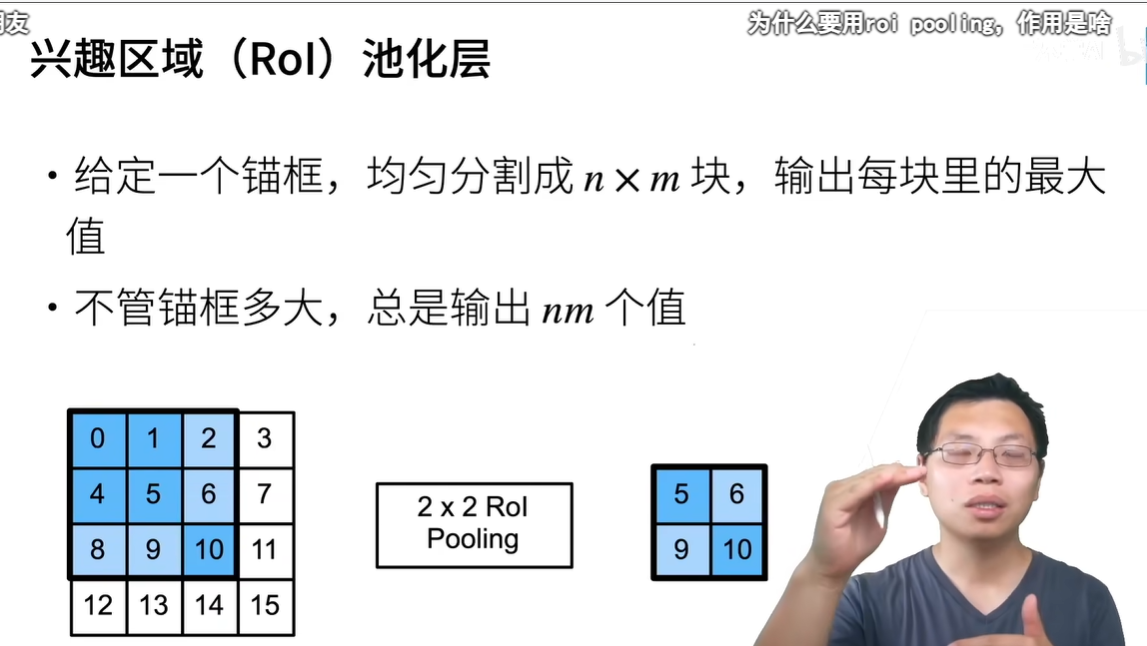

目的是让每个锚框都可以变成想要的形状

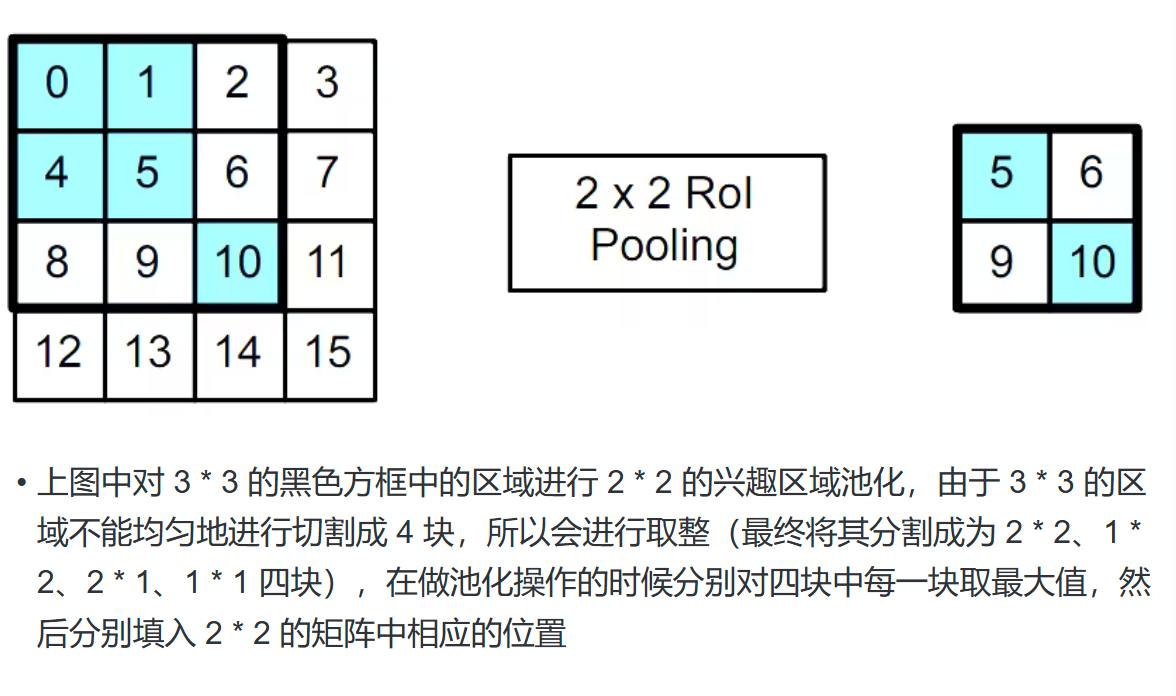

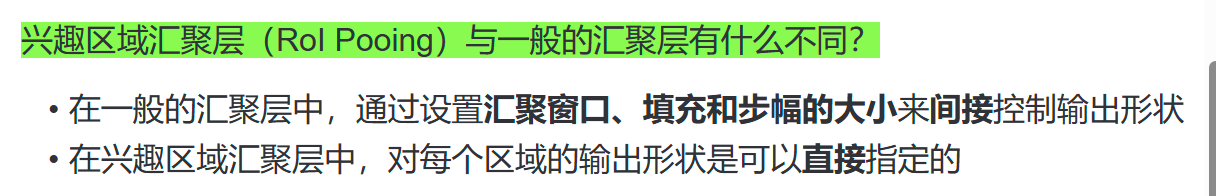

# Fast-CNN是R-CNN的第一个优化版本

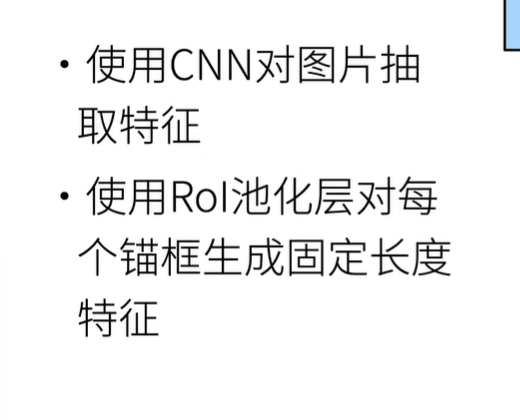

R-CNN的主要性能瓶颈在于，对每个提议区域，卷积神经网络的前向传播是独立的，而没有共享计算。 由于这些区域通常有重叠，独立的特征抽取会导致重复的计算。 Fast R-CNN (Girshick, 2015)对R-CNN的主要改进之一，是仅在整张图象上执行卷积神经网络的前向传播。

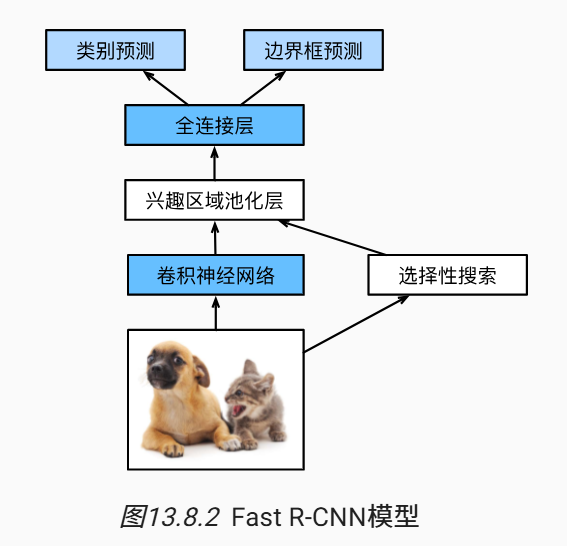
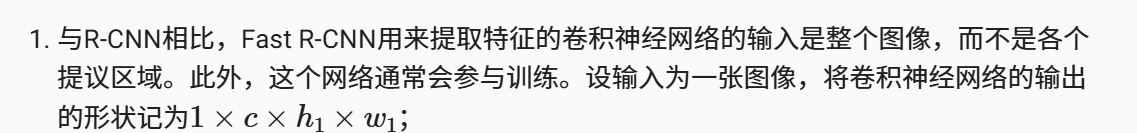
RCNN是对每个锚框提取CNN特征，FRCNN是对整个图片提取CNN特征，再映射每个锚框到特征图中

# Faster R-CNN
为了较精确地检测目标结果，Fast R-CNN模型通常需要在选择性搜索中生成大量的提议区域。 Faster R-CNN (Ren et al., 2015)提出将选择性搜索替换为区域提议网络（region proposal network），从而减少提议区域的生成数量，并保证目标检测的精度。
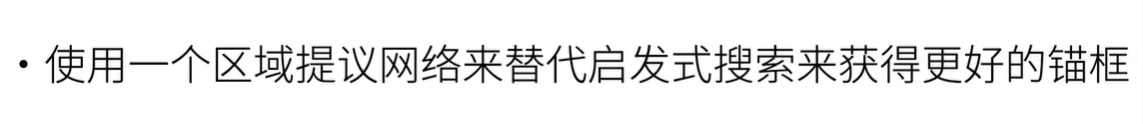
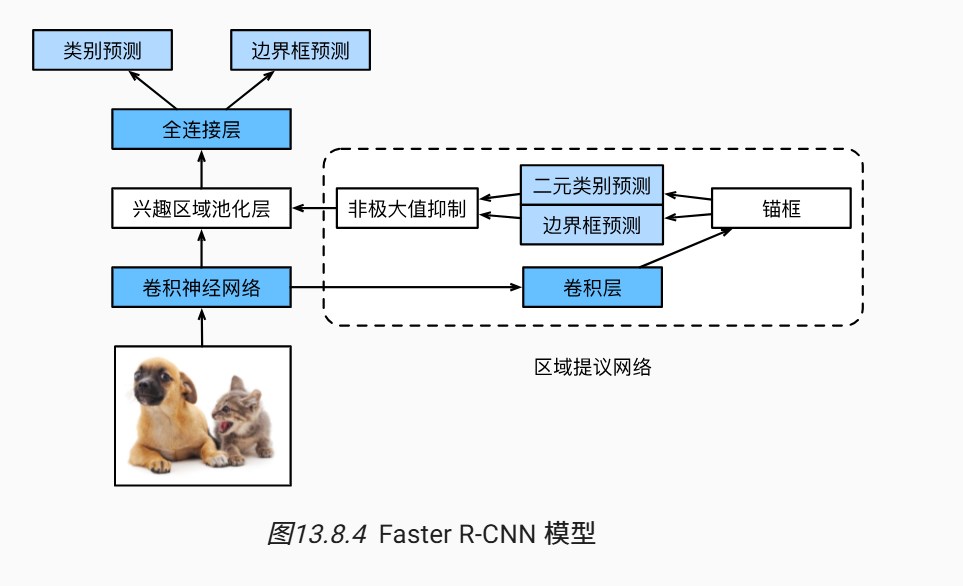
从选择性搜索改为了区域提议网络，模型的其余部分保持不变。

# Mask R-CNN
如果在训练集中还标注了每个目标在图像上的像素级位置，那么Mask R-CNN (He et al., 2017)能够有效地利用这些详尽的标注信息进一步提升目标检测的精度。

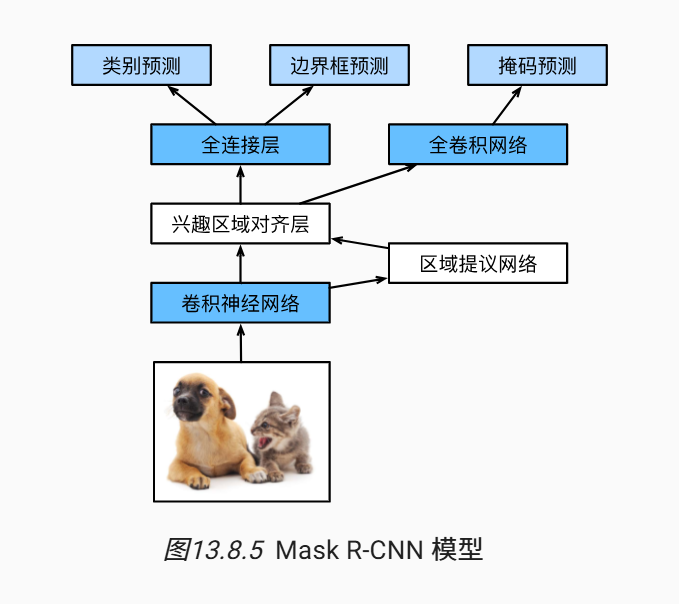

Mask R-CNN是基于Faster R-CNN修改而来的。 具体来说，Mask R-CNN将兴趣区域汇聚层替换为了 兴趣区域对齐层，使用双线性插值（bilinear interpolation）来保留特征图上的空间信息，从而更适于像素级预测。 兴趣区域对齐层的输出包含了所有与兴趣区域的形状相同的特征图。 它们不仅被用于预测每个兴趣区域的类别和边界框，还通过额外的全卷积网络预测目标的像素级位置。 本章的后续章节将更详细地介绍如何使用全卷积网络预测图像中像素级的语义。

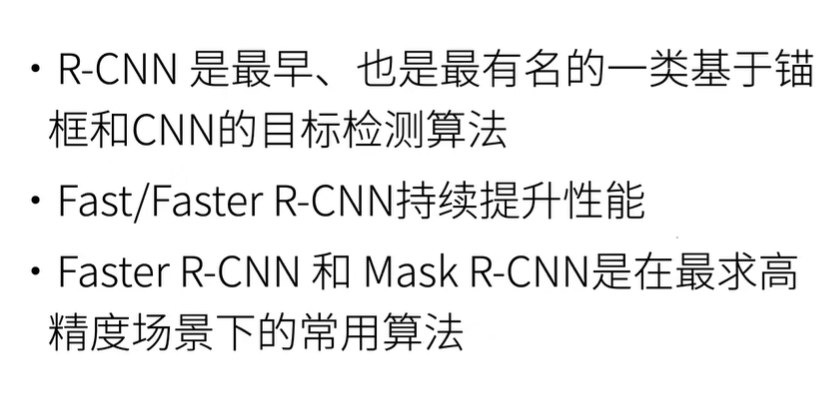

R-CNN是用神经网络来做目标检测 并对它持续改进

 # 单发多框检测（SSD）
 
 # 锚框的生成时是基础
 
 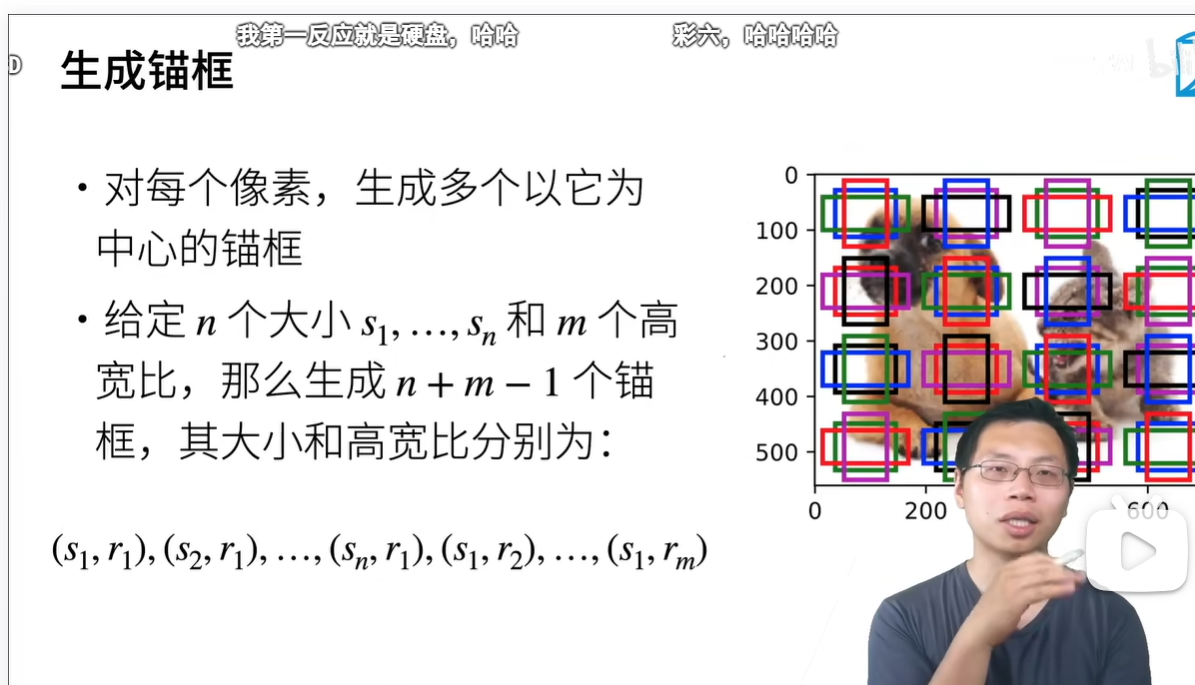
 
 此模型主要由基础网络组成，其后是几个多尺度特征块。 基本网络用于从输入图像中提取特征，因此它可以使用深度卷积神经网络。 单发多框检测论文中选用了在分类层之前截断的VGG (Liu et al., 2016)，现在也常用ResNet替代。 我们可以设计基础网络，使它输出的高和宽较大。 这样一来，基于该特征图生成的锚框数量较多，可以用来检测尺寸较小的目标。 接下来的每个多尺度特征块将上一层提供的特征图的高和宽缩小（如减半），并使特征图中每个单元在输入图像上的感受野变得更广阔。
 
 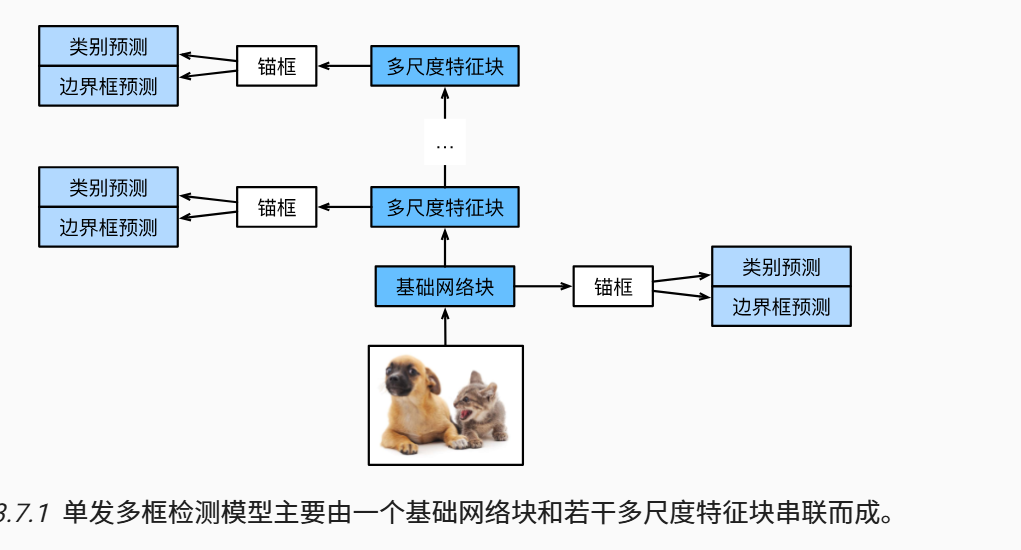
 
 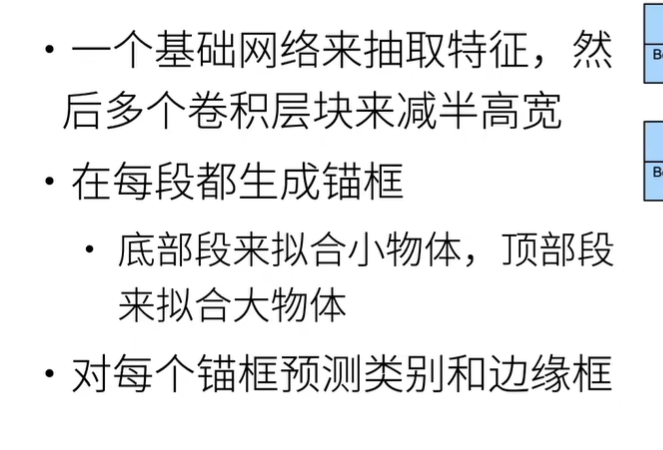
 
 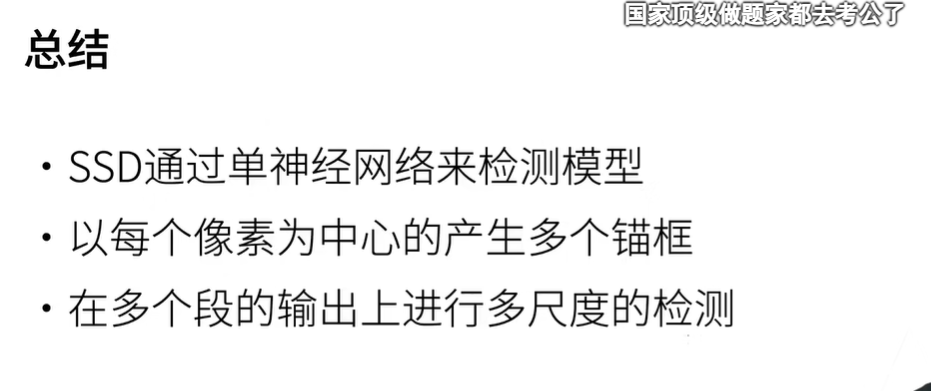

# YOLO（你只看一次 追求速度）

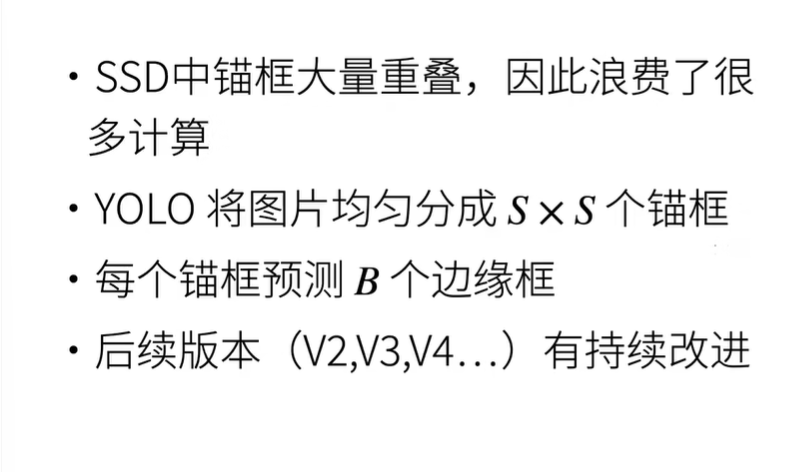

目标检测算法主要分为两个类型
（1）two-stage方法，如R-CNN系算法（region-based CNN），其主要思路是先通过启发式方法（selective search）或者CNN网络（RPN)产生一系列稀疏的候选框，然后对这些候选框进行分类与回归，two-stage方法的优势是准确度高
（2）one-stage方法，如Yolo和SSD，其主要思路是均匀地在图片的不同位置进行密集抽样，抽样时可以采用不同尺度和长宽比，然后利用CNN提取特征后直接进行分类与回归，整个过程只需要一步，所以其优势是速度快，但是均匀的密集采样的一个重要缺点是训练比较困难，这主要是因为正样本与负样本（背景）极其不均衡，导致模型准确度稍低